In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import pylcpGpu

from scipy.optimize import OptimizeResult


In [ ]:
atom = pylcpGpu.atom("87Rb")
k = 2*np.pi/780E-7                      #波矢 单位cm^{-1} 
x0 = 1/k                                #长度单位换算因子 换算后单位是cm
gamma=atom.state[2].gammaHz             #原子自然线宽 单位Hz 
t0 = 1/gamma                            #时间单位换算因子 换算后单位是s
kb = 1.3806503E-23


In [ ]:
sols_1 = []
with h5py.File('/home/zhuyuchen/sol2D.h5', 'r') as f:
    sol = OptimizeResult()
    group = f['sol']
    for key in group.keys():
        sol[key] = np.array(group[key])

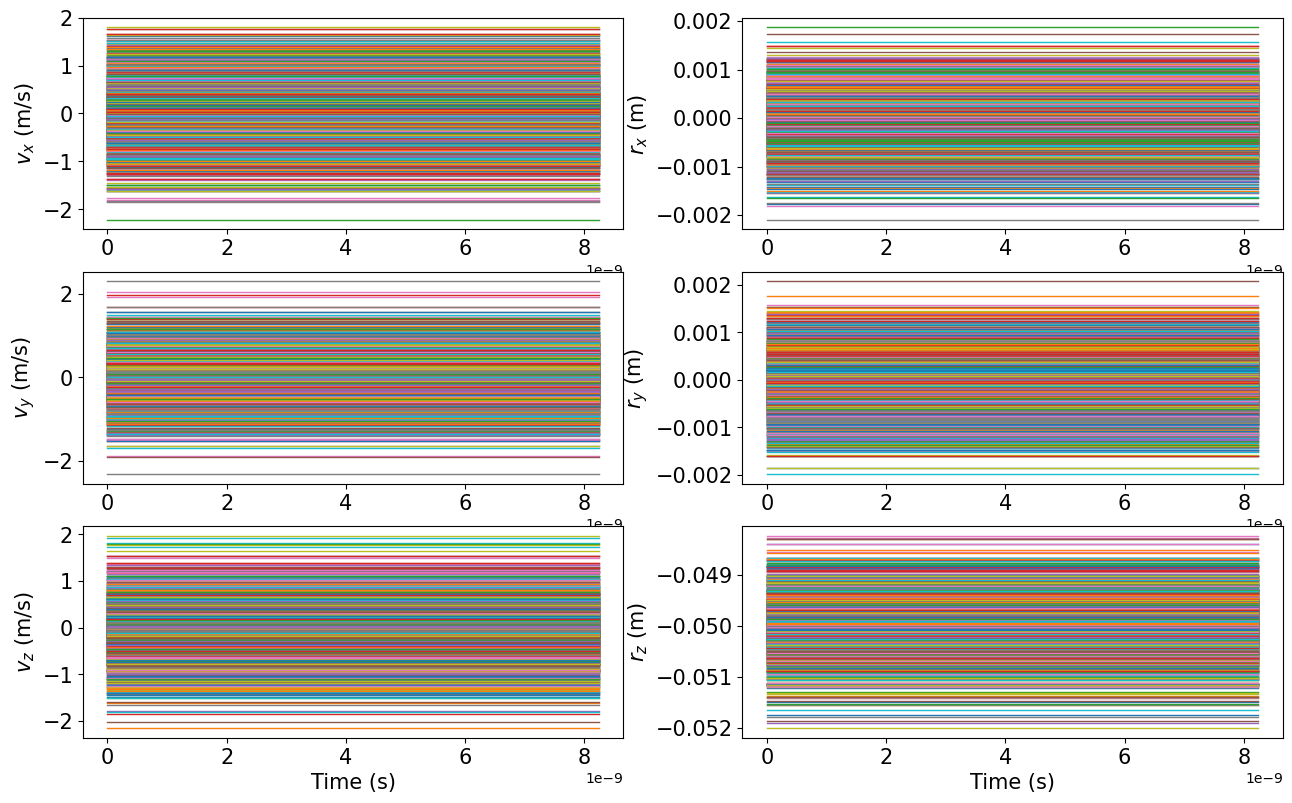

In [5]:
k = 2*np.pi/780E-7   
#速度位置
fig, ax = plt.subplots(3, 2, figsize=(15, 9))
# 遍历数据维度
for ii in range(3):
    # 遍历原子个数
    for idx in range(sol.r.shape[-1]):
        ax[ii, 0].plot(sol.t * t0, sol.v[:, ii, idx] * (atom.state[2].gammaHz / k / 100), linewidth=1)
        ax[ii, 1].plot(sol.t * t0, sol.r[:, ii, idx] * x0/100 , linewidth=1)
  
    ax[ii, 0].set_ylabel(f'$v_{{{"xyz"[ii]}}}$ (m/s)', fontsize=15)
    ax[ii, 1].set_ylabel(f'$r_{{{"xyz"[ii]}}}$ (m)', fontsize=15)  
    ax[ii, 0].tick_params(axis='both', labelsize=15)  # 调整刻度标签字体大小
    ax[ii, 1].tick_params(axis='both', labelsize=15)  # 调整刻度标签字体大小
for ax_i in ax[-1, :]:
    ax_i.set_xlabel('Time (s)', fontsize=15)
    ax_i.tick_params(axis='both', labelsize=15)  # 调整刻度标签字体大小
fig.subplots_adjust(left=0.1, bottom=0.08, wspace=0.22)
plt.show()